In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.patches import Circle, Ellipse
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tripsv = pd.read_table("C:/Users/michaelm/Desktop/FCGR/CNV assays results.txt", sep="\t", header=0)

In [3]:
hapmap_pca = pd.read_table("FCGR_iChip-PCA.tsv", sep="\t", header=0, index_col=0)
tripsv_merge = pd.merge(tripsv, hapmap_pca, left_on="Sample", right_index=True, how='inner')
tripsv_merge.shape

(87, 1455)

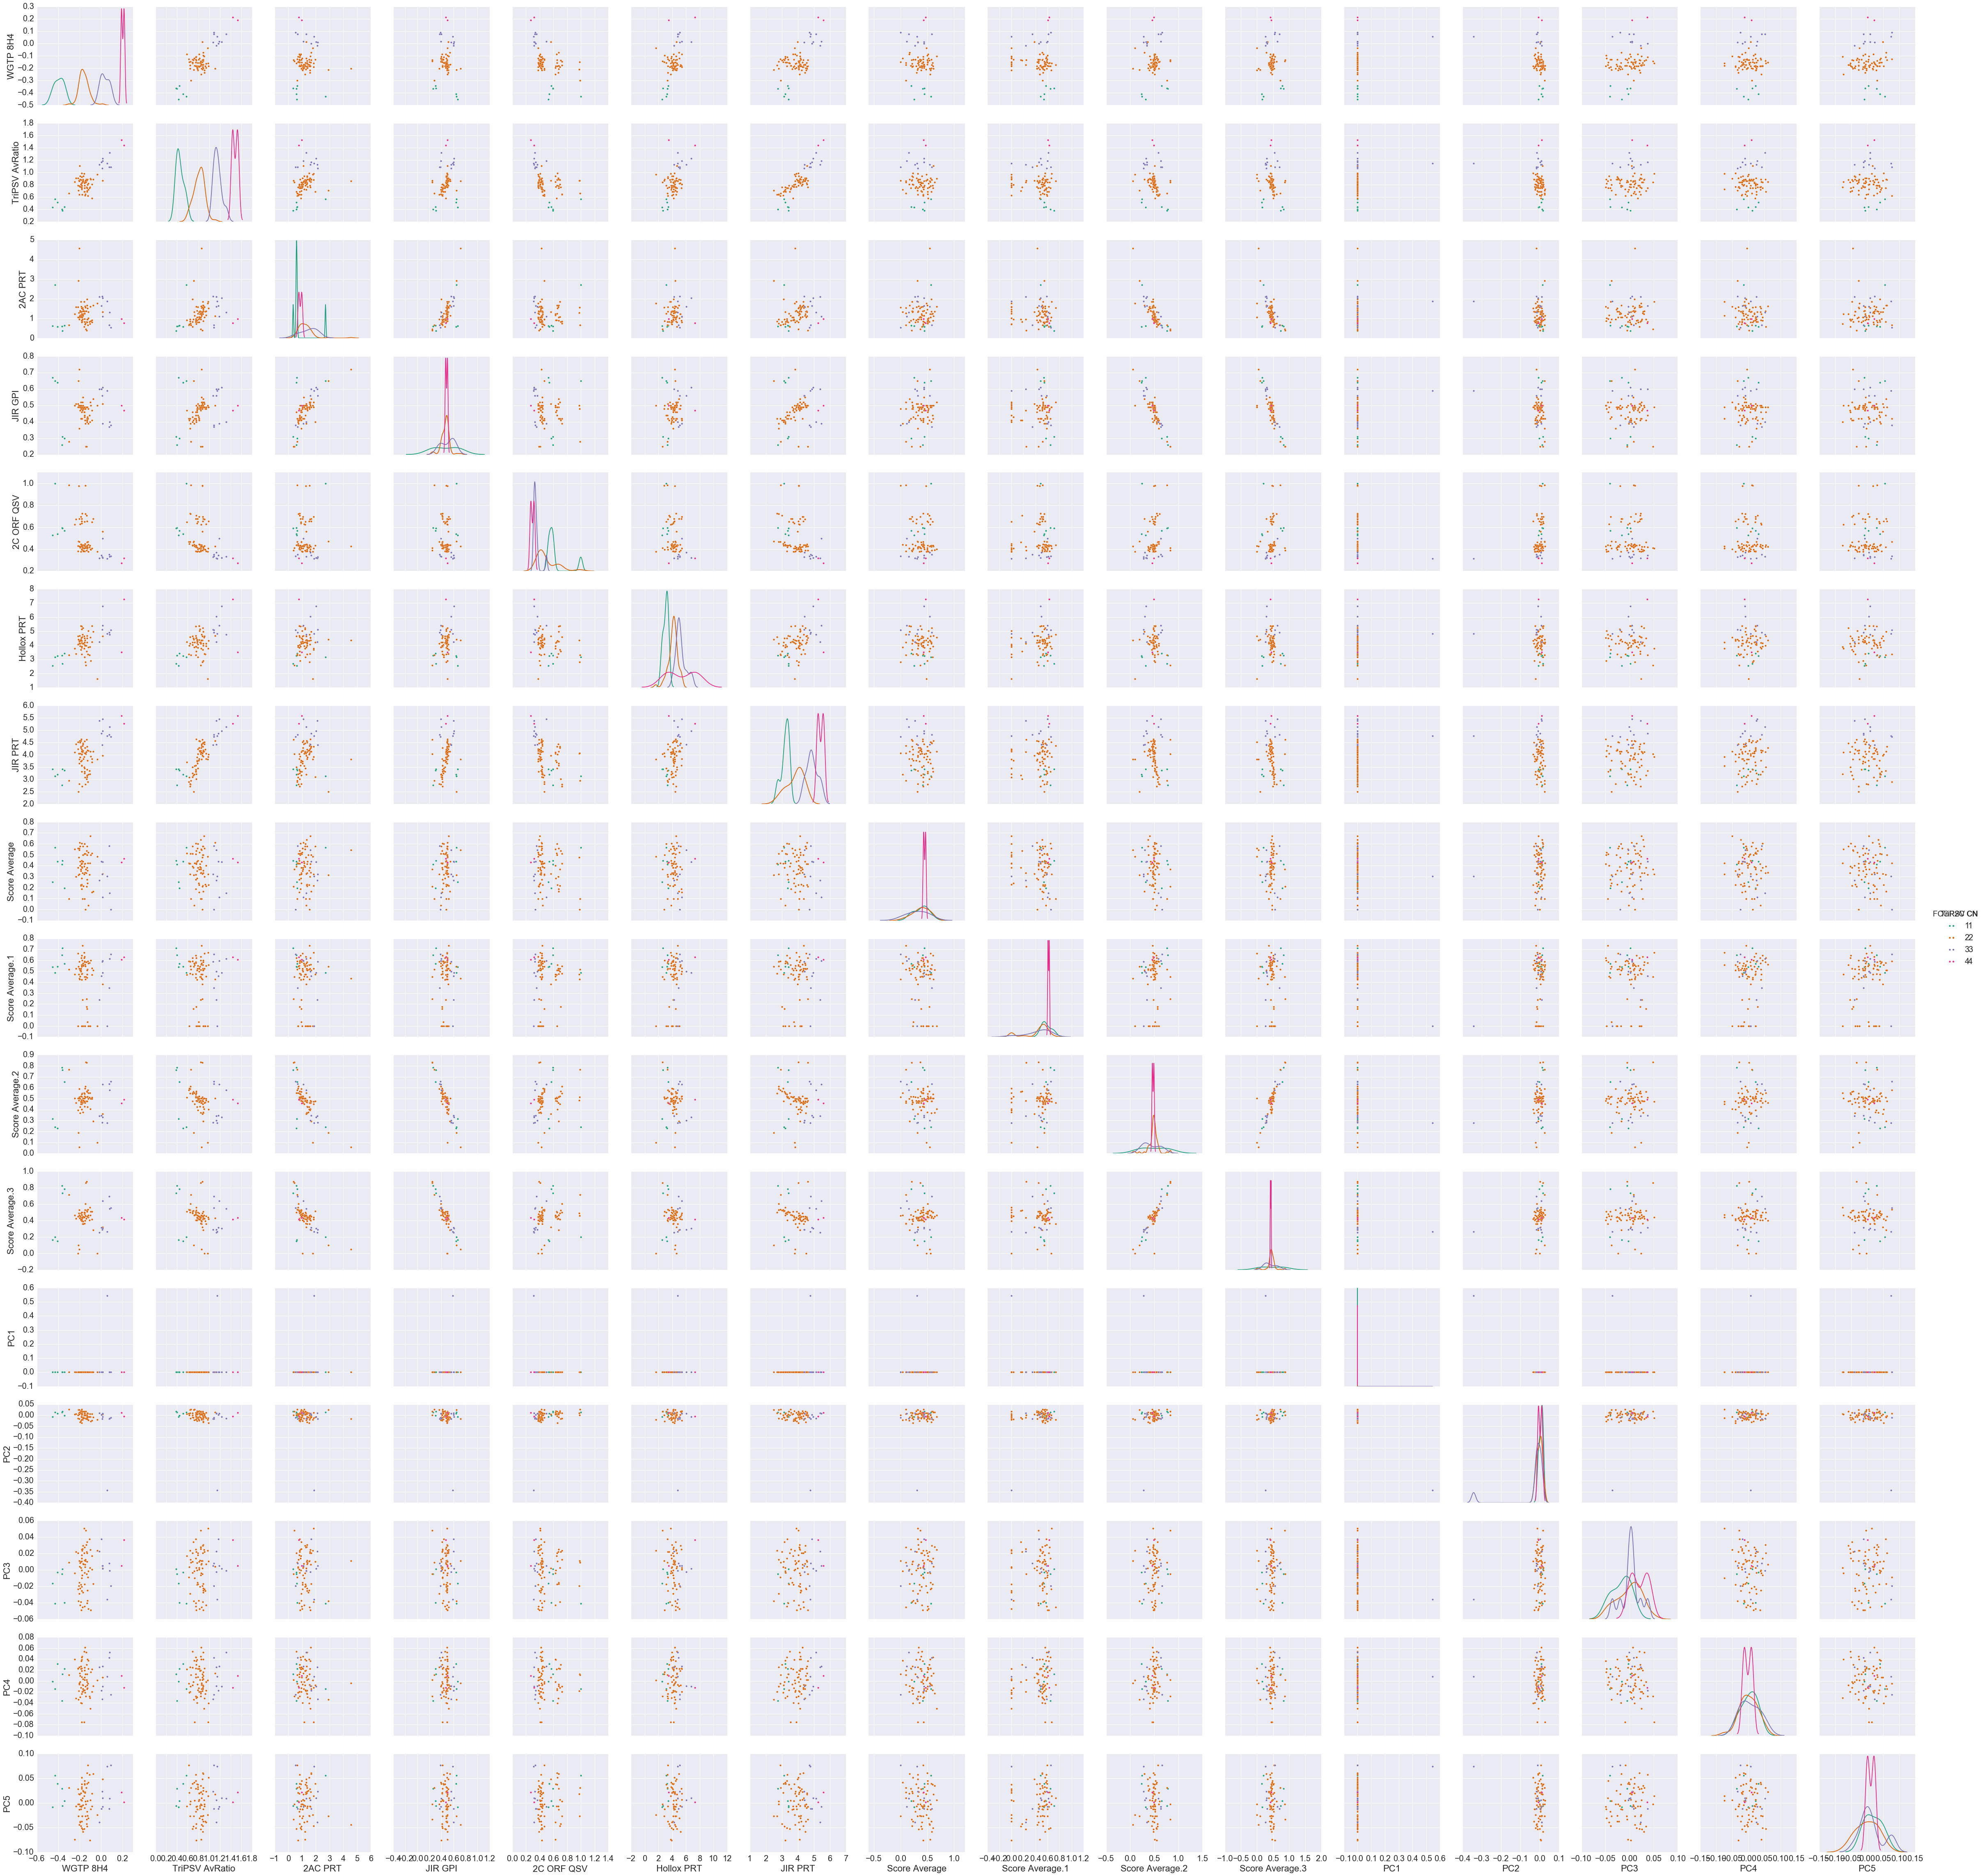

In [4]:
# plot all of the current FCGR assays accumulated across the HapMap CEU samples
sns.set_style(style="whitegrid")
sns.set_context("paper")
sns.set(font_scale=2)
colmap = sns.color_palette("Dark2")
#plt.figure(figsize=(12, 12))
tg = sns.pairplot(tripsv_merge, hue="TriPSV CN", palette=colmap,
                  vars=["WGTP 8H4", "TriPSV AvRatio", "2AC PRT", "JIR GPI",
                       "2C ORF QSV", "Hollox PRT", "JIR PRT", "Score Average",
                       "Score Average.1", "Score Average.2", "Score Average.3",
                       "PC1", "PC2", "PC3", "PC4", "PC5"],
                  size=4, aspect=1, diag_kind="kde")
tg.add_legend(title="FCGR2C CN")
#plt.savefig("C:/Users/michaelm/Desktop/FCGR/Images/All_assays.png", bbox_inches="tight", dpi=300)

In [5]:
# melt for just TriPSV, WGTP and PRT
tri_small = tripsv_merge[["WGTP 8H4", "TriPSV AvRatio", "2AC PRT", "TriPSV CN"]]
tri_melt = pd.melt(tri_small, id_vars="TriPSV CN")

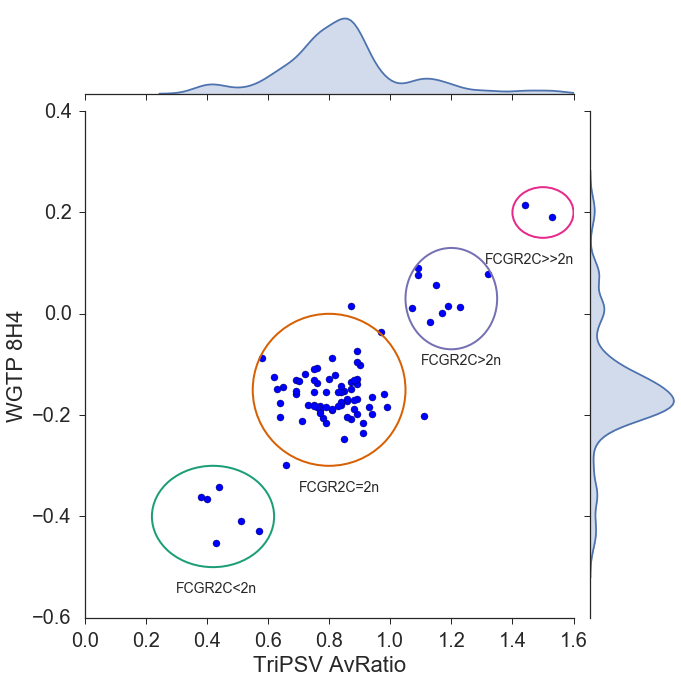

In [6]:
colmap = sns.color_palette("Dark2")
sns.set_style("ticks")
plt.figure(figsize=(12, 12))
trig = sns.JointGrid(data=tri_small, x="TriPSV AvRatio", y="WGTP 8H4",
                     size=10, xlim=(0, 1.6), ylim=(-0.6, 0.4),
                    )

# add the scatter 
trig.plot_joint(plt.scatter, s=50)

# add lines between groups before the marginal plots
circ1n = Ellipse((0.42, -0.4), 0.4, 0.2, fill=False, linewidth=2,
                 color=colmap[0])
circ2n = Ellipse((0.8, -0.15), 0.5, 0.3, fill=False, linewidth=2,
                color=colmap[1])
circ3n = Ellipse((1.2, 0.03), 0.3, 0.2, fill=False, linewidth=2,
                color=colmap[2])
circ4n = Ellipse((1.5, 0.2), 0.2, 0.1, fill=False, linewidth=2,
                color=colmap[3])

plt.gca().add_patch(circ1n)
plt.gca().add_patch(circ2n)
plt.gca().add_patch(circ3n)
plt.gca().add_patch(circ4n)


# add a little text
plt.text(0.3, -0.55, "FCGR2C<2n", fontsize=14)
plt.text(0.7, -0.35, "FCGR2C=2n", fontsize=14)
plt.text(1.1, -0.1, "FCGR2C>2n", fontsize=14)
plt.text(1.31, 0.1, "FCGR2C>>2n", fontsize=14)

# add the marginal kernal density plots
trig.plot_marginals(sns.kdeplot, shade=True)

plt.savefig("C:/Users/michaelm/Desktop/FCGR/Images/TriPSV_vs_WGTP.png", bbox_inches="tight", dpi=90)
#plt.show()

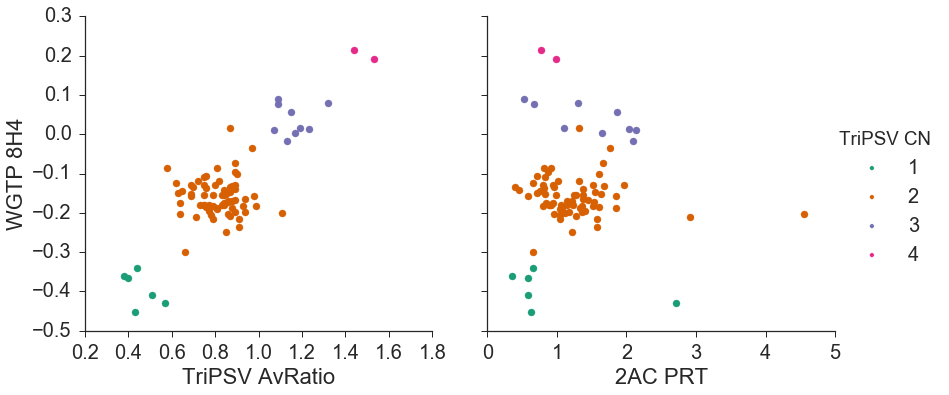

In [7]:
plt.figure(figsize=(12, 12))
qg = sns.pairplot(tri_small, hue="TriPSV CN", palette=colmap,
                  y_vars="WGTP 8H4", x_vars=["TriPSV AvRatio", "2AC PRT"],
                  size=6, aspect=1)
qg.map(plt.scatter, s=50)
plt.savefig("C:/Users/michaelm/Desktop/FCGR/Images/TriPSV_vs_other.png", bbox_inches="tight", dpi=300)

In [8]:
tri_small.head()

,WGTP 8H4,TriPSV AvRatio,2AC PRT,TriPSV CN
0,-0.137,0.76,0.82,2
1,0.191,1.53,0.98,4
2,0.215,1.44,0.77,4
3,-0.101,0.90,1.60,2
4,-0.130,0.69,1.97,2


In [9]:
# melt for just FCGR3 CN
pcs = ["PC{}".format(px) for px in range(1, 150)]
pcs.extend(["WGTP 8H4", "JIR GPI", "Hollox PRT", "JIR PRT", "JIR 3A CN", "JIR 3B CN", "TriPSV CN",
           "TriPSV AvRatio"])
fcgr_small = tripsv_merge[pcs]
fcgr_small["JIR 3A CN"] = np.round(fcgr_small["JIR 3A CN"])
fcgr_small["JIR 3B CN"] = np.round(fcgr_small["JIR 3B CN"])

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


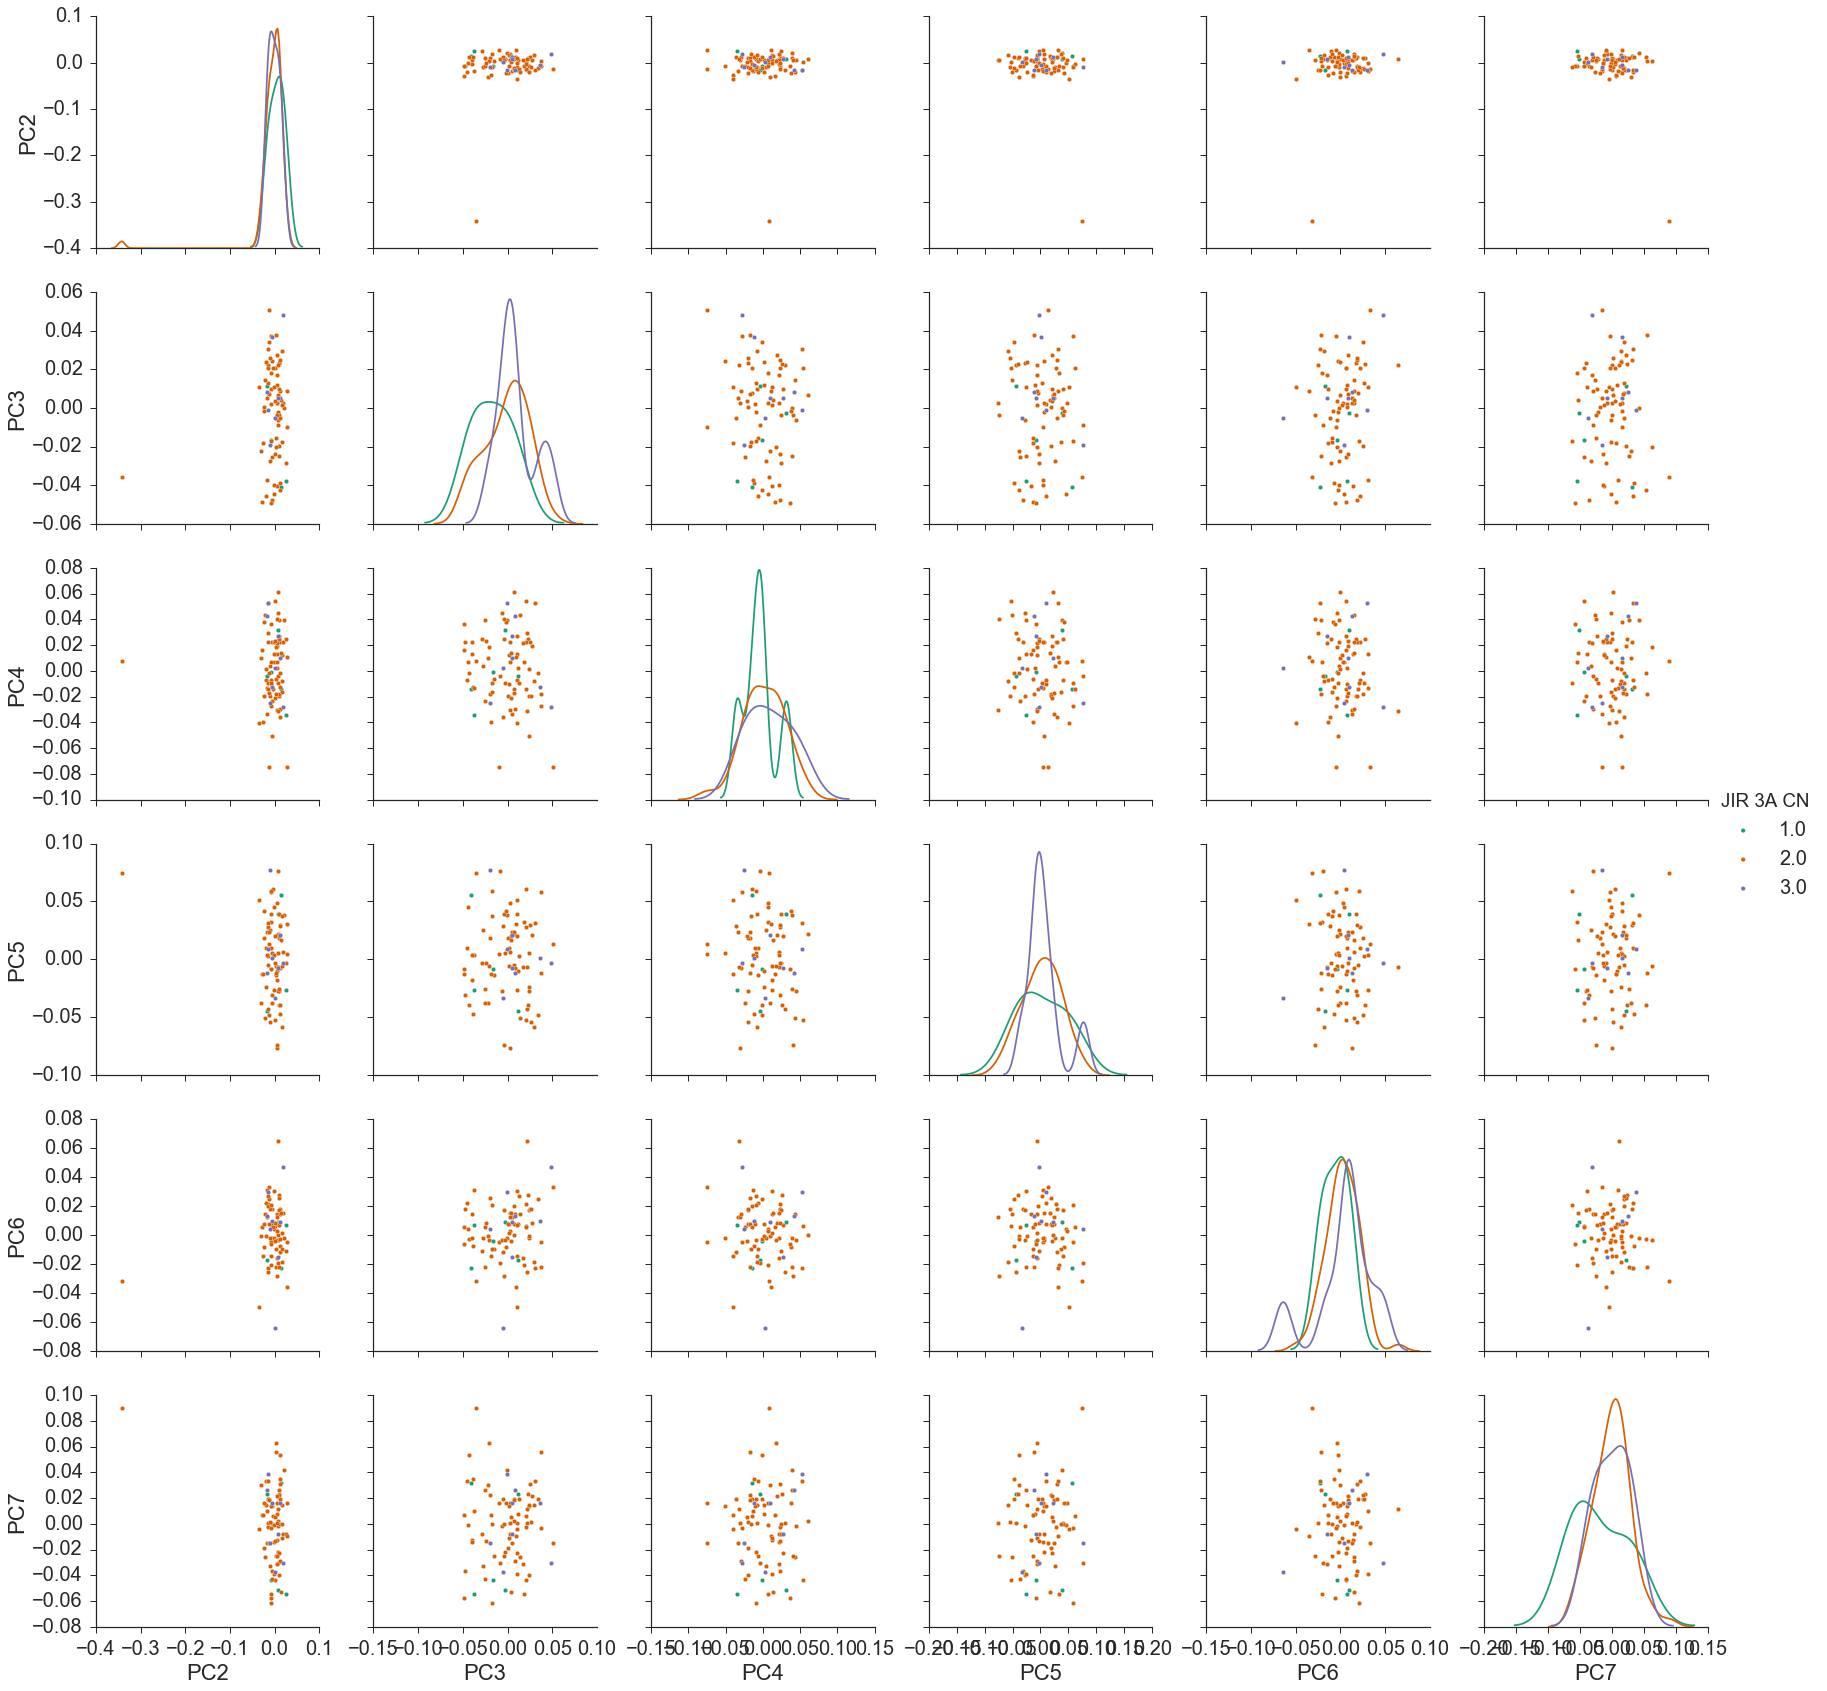

In [10]:
sns.set_context(font_scale=0.5)
#sns.set_context(font_scale=2)
colmap = sns.color_palette("Dark2")
fg = sns.pairplot(fcgr_small, hue="JIR 3A CN", palette=colmap,
                  vars=["PC{}".format(fx) for fx in range(2, 8)],
                  size=4, aspect=1, diag_kind="kde")
#fg.add_legend(title="FCGR3A CN")
plt.savefig("C:/Users/michaelm/Desktop/FCGR/Images/PCA_assay.png", bbox_inches="tight", dpi=90)

In [11]:
fcgr_small["JIR 3A CN"] = fcgr_small["JIR 3A CN"].fillna(0)
fcgr_small["JIR 3B CN"] = fcgr_small["JIR 3B CN"].fillna(0)
fcgr_cn = lambda x: "{}:{}".format(np.int64(x["JIR 3A CN"]), np.int64(x["JIR 3B CN"]))
fcgr_small.loc[:, "3A:3B CN"] = fcgr_small.apply(fcgr_cn, axis=1)
# mask out non-CN called individuals
fcgr_small = fcgr_small.loc[~(fcgr_small["3A:3B CN"] == "nan:nan")]

cols = ["orangish", "windows blue", "dark pink","chestnut", "yellow", "bright purple", "vermillion",
       "bright turquoise", "adobe", "apple green", ]

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda2\lib\site-packages\pandas\core\indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

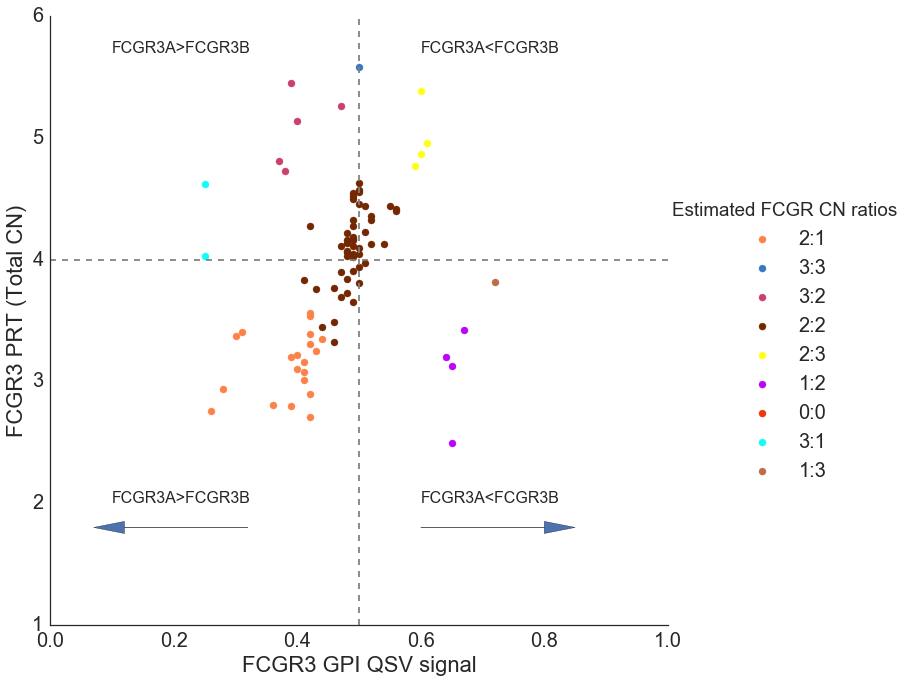

In [12]:
sns.set_style("white")
plt.figure(figsize=(15, 15))
tg = sns.FacetGrid(fcgr_small,  palette=sns.xkcd_palette(cols),
                  hue="3A:3B CN",
                  size=10, aspect=1, xlim=(0, 1), ylim=(1, 6))
tg.map(plt.scatter, "JIR GPI", "JIR PRT", s=50)
tg.add_legend(title="Estimated FCGR CN ratios")
# add reference lines for < 3A and > 3B on GPI axis
plt.plot([0.5, 0.5], [1, 6], ls="--", color="grey")

# add reference lines for < 3A and >3B on PRT axis
plt.plot([0, 1], [4, 4], ls="--", color="grey")

# add annotation text
# test putting an arrow on the GPI axis
plt.text(0.1, 2, "FCGR3A>FCGR3B", fontsize=16)
plt.arrow(0.32, 1.8, -0.2, 0, head_width=0.1,
         head_length=0.05)

plt.text(0.6, 2, "FCGR3A<FCGR3B", fontsize=16)
plt.arrow(0.6, 1.8, 0.2, 0, head_width=0.1,
         head_length=0.05)

# don't need arrow on top quadrants
plt.text(0.1, 5.7, "FCGR3A>FCGR3B", fontsize=16)
plt.text(0.6, 5.7, "FCGR3A<FCGR3B", fontsize=16)


tg.set_axis_labels("FCGR3 GPI QSV signal", "FCGR3 PRT (Total CN)")
plt.savefig("C:/Users/michaelm/Desktop/FCGR/Images/FCGR3A_GPI.png", bbox_inches="tight", dpi=90)
plt.show()

In [13]:
fcgr_small.columns

Index([u'PC1', u'PC2', u'PC3', u'PC4', u'PC5', u'PC6', u'PC7', u'PC8', u'PC9',
       u'PC10',
       ...
       u'PC149', u'WGTP 8H4', u'JIR GPI', u'Hollox PRT', u'JIR PRT',
       u'JIR 3A CN', u'JIR 3B CN', u'TriPSV CN', u'TriPSV AvRatio',
       u'3A:3B CN'],
      dtype='object', length=158)

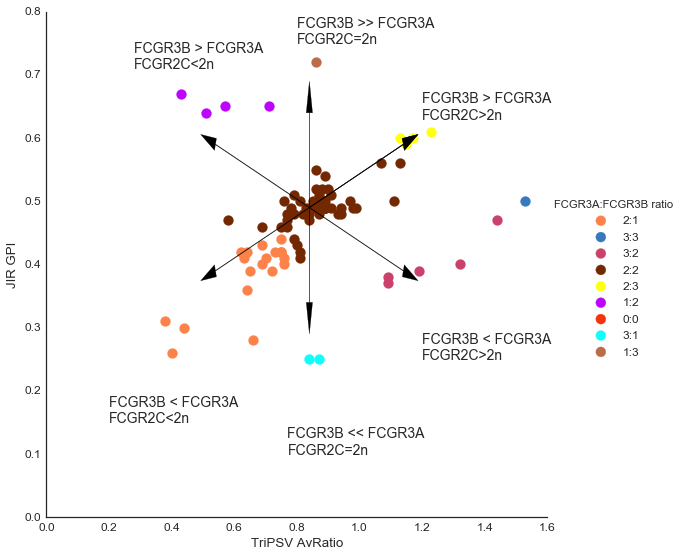

In [14]:
sns.set_context("paper", font_scale=1.5)
tgq = sns.FacetGrid(fcgr_small, size=8, aspect=1, palette=sns.xkcd_palette(cols),
                  hue="3A:3B CN",
                   xlim=[0, 1.6], ylim=[0, 0.8])
tgq.map(plt.scatter, "TriPSV AvRatio", "JIR GPI", s=100)
tgq.add_legend(title="FCGR3A:FCGR3B ratio")


# add reference lines and/or circles for CN clusters?
plt.arrow(0.84, 0.49, 0.3, 0.1, head_width=0.02, head_length=0.05,
         color="black")
plt.arrow(0.84, 0.49, -0.3, 0.1, head_width=0.02, head_length=0.05,
         color="black")
plt.arrow(0.84, 0.49, -0.3, -0.1, head_width=0.02, head_length=0.05,
         color="black")
plt.arrow(0.84, 0.49, 0.3, -0.1, head_width=0.02, head_length=0.05,
         color="black")
plt.arrow(0.84, 0.49, 0.3, 0.1, head_width=0.02, head_length=0.05,
         color="black")
plt.arrow(0.84, 0.49, 0, 0.15 , head_width=0.02, head_length=0.05,
         color="black")
plt.arrow(0.84, 0.49, 0, -0.15 , head_width=0.02, head_length=0.05,
         color="black")

# annotate the arrow points with FCGR3 + FCGR2C CN
plt.text(1.2, 0.63, "FCGR3B > FCGR3A\nFCGR2C>2n", fontsize=14)
plt.text(0.8, 0.75, "FCGR3B >> FCGR3A\nFCGR2C=2n", fontsize=14)
plt.text(0.28, 0.71, "FCGR3B > FCGR3A\nFCGR2C<2n", fontsize=14)
plt.text(0.2, 0.15, "FCGR3B < FCGR3A\nFCGR2C<2n", fontsize=14)
plt.text(0.77, 0.1, "FCGR3B << FCGR3A\nFCGR2C=2n", fontsize=14)
plt.text(1.2, 0.25, "FCGR3B < FCGR3A\nFCGR2C>2n", fontsize=14)

plt.savefig("C:/Users/michaelm/Desktop/FCGR/Images/GPI_TriPSV.png", bbox_inches="tight", dpi=90)